<a href="https://colab.research.google.com/github/rika-27/DMT/blob/master/Titanic_SVC.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
%tensorflow_version 1.x

TensorFlow 1.x selected.


In [0]:
import pandas as pd
import numpy as np
from sklearn.model_selection import GridSearchCV
from keras.models import Sequential
from keras.layers import Dense
from keras.wrappers.scikit_learn import KerasClassifier
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from keras.optimizers import Nadam, SGD, Adam
from keras.constraints import maxnorm
from keras.layers import Dropout
from sklearn.metrics import accuracy_score
from sklearn.metrics import f1_score

In [0]:
import tensorflow
print(tensorflow.__version__)

1.15.2


In [0]:
!unzip titanic.zip

Archive:  titanic.zip
  inflating: gender_submission.csv   
  inflating: test.csv                
  inflating: train.csv               


In [0]:
df = pd.read_csv("train.csv")
df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [0]:
test = pd.read_csv("test.csv")
test

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...
413,1305,3,"Spector, Mr. Woolf",male,NaN,0,0,A.5. 3236,8.0500,NaN,S
414,1306,1,"Oliva y Ocana, Dona. Fermina",female,39.0,0,0,PC 17758,108.9000,C105,C
415,1307,3,"Saether, Mr. Simon Sivertsen",male,38.5,0,0,SOTON/O.Q. 3101262,7.2500,NaN,S
416,1308,3,"Ware, Mr. Frederick",male,NaN,0,0,359309,8.0500,NaN,S


In [0]:
test.Fare.isnull().sum()

1

In [0]:
def preprocess(df):
  df.drop(columns= ["Name", "Ticket", "Cabin", "PassengerId"], inplace= True, axis=1) 
  df.replace({'Sex':{'male': 1, 'female':0}, 'Embarked':{'S': 1, 'C': 2, 'Q':3}}, inplace=True)
  heatplot(df)
  df = df[df['Embarked'].notna()]
  df.Age.fillna(pd.Series([np.random.normal(loc=df.Age.mean(), scale = df.Age.std()) for x in range(len(df))]), inplace=True)
  heatplot(df)
  df[["Age", "Fare"]] = (df[["Age", "Fare"]] - df[["Age", "Fare"]].mean())/df[["Age", "Fare"]].std()
  return df

In [0]:
def heatplot(df):
  df.corr()
  plot = plt.figure(figsize=(10,7))
  sns.heatmap(df.corr(), annot = True)
  return plot

/usr/local/lib/python3.6/dist-packages/pandas/core/generic.py:6245: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._update_inplace(new_data)
/usr/local/lib/python3.6/dist-packages/pandas/core/frame.py:2963: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[k1] = value[k2]


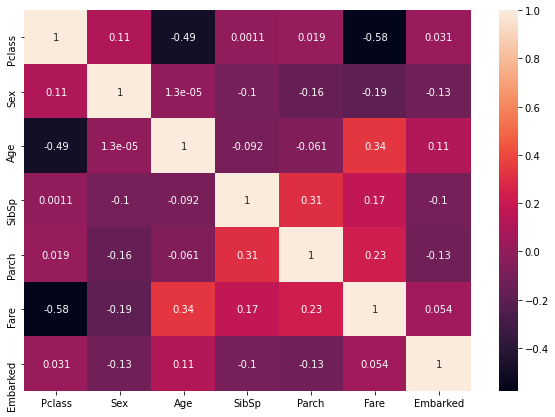

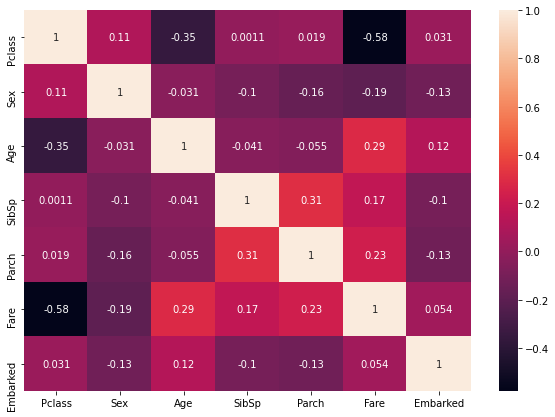

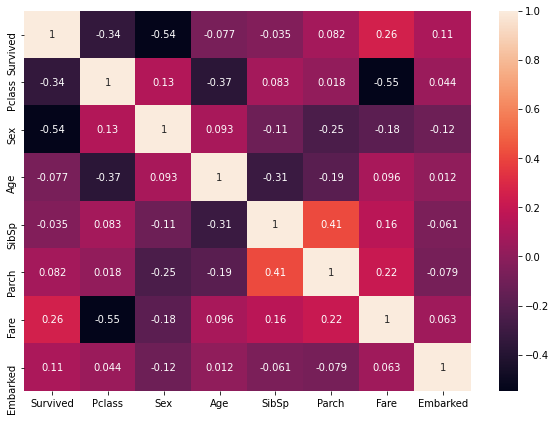

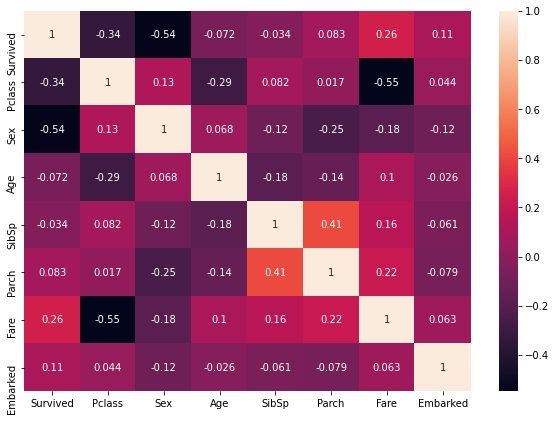

In [0]:
testdf = preprocess(test)
df = preprocess(df)

In [0]:
X = df.drop(columns=['Survived']).values
Y = df[df.columns[0]].values
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.20, random_state=27)

In [0]:
def create_model(learn_rate=0.1, neurons=20):
	# create model
	model = Sequential()
	model.add(Dense(neurons, input_dim=7, kernel_initializer='he_normal', activation='softplus', kernel_constraint=maxnorm(4)))
	model.add(Dropout(0.2))
	model.add(Dense(1, kernel_initializer='he_normal', activation='sigmoid'))
	optimizer = Nadam(lr=0.01)
  # Compile model
	model.compile(loss='binary_crossentropy', optimizer='Nadam', metrics=['accuracy'])
	return model

def create_model_graphs(learn_rate=0.1, neurons=20):
	# create model
	model = Sequential()
	model.add(Dense(neurons, input_dim=2, kernel_initializer='he_normal', activation='softplus', kernel_constraint=maxnorm(4)))
	model.add(Dropout(0.2))
	model.add(Dense(1, kernel_initializer='he_normal', activation='sigmoid'))
	optimizer = Nadam(lr=0.01)
  # Compile model
	model.compile(loss='binary_crossentropy', optimizer='Nadam', metrics=['accuracy'])
	return model

In [0]:
seed = 7
np.random.seed(seed)

In [0]:
model = KerasClassifier(build_fn=create_model, epochs=100, batch_size=80, verbose=0)
model_graphs = KerasClassifier(build_fn=create_model_graphs, epochs=100, batch_size=80, verbose=0)

In [0]:
predict = model.fit(X_train, y_train)
# np.shape(X)
# np.shape(Y)
# df.Survived.values
# np.shape(df.Survived.values)
# np.shape(df.drop(columns=['Survived']).values)

Instructions for updating:
If using Keras pass *_constraint arguments to layers.
Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where



In [0]:
prediction = model.predict(X_train)

In [0]:
#print(accuracy_score(prediction, y_train))
print(f1_score(prediction, y_train, labels=None, pos_label=1, average='binary', sample_weight=None, zero_division='warn'))

0.7333333333333334


In [0]:
P = model.predict(X_train)

In [0]:
testdf.Fare.fillna(testdf.loc[testdf.Pclass == 3].Fare.mean(), inplace = True)

In [0]:
X = testdf.values
out = model.predict(X)

In [0]:
f1_score(y_true, y_pred, labels=None, pos_label=1, average='binary', sample_weight=None, zero_division='warn')

In [0]:
s = pd.DataFrame(out, columns = ['Survived'])

In [0]:
test1 = pd.read_csv("test.csv")
Pid = test1.PassengerId
OP = pd.concat([Pid, s], axis = 1)
OP.to_csv('prediction.csv', index = False)

Mean squared error : 0.21
Coefficient of determination: 0.10



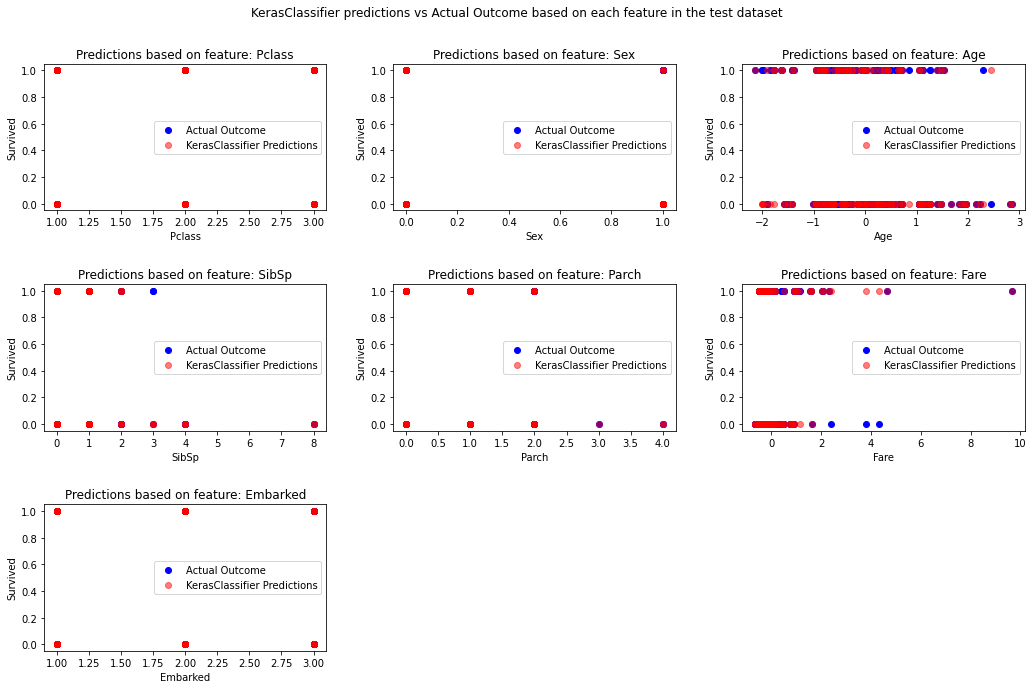

In [0]:
# importing MSE and R2Score for evaluation
from sklearn.metrics import mean_squared_error, r2_score

# Using your Cross validation set predictions
pred = model.predict(X_test)

# Printing the MSE for SVC (comparing predictions with actual cv set outputs)
print('Mean squared error : %.2f' % mean_squared_error(y_test, pred))
# The coefficient of determination: 1 is perfect prediction
print('Coefficient of determination: %.2f\n' % r2_score(y_test, pred))

#Plotting SVC predictions vs Actual Outcome based on each feature in the test dataset
fig, ax = plt.subplots(3, 3, figsize=(15, 10))
# Deleting an empty sublot 2,1
fig.delaxes(ax[2,1]) 
# Deleting an empty sublot 2,2
fig.delaxes(ax[2,2])
for i in range(np.shape(X_test)[1]):
  ax.reshape(9, 1)[i][0].scatter(X_test[:, i], y_test, color = 'blue', label = 'Actual Outcome', alpha=1)
  ax.reshape(9, 1)[i][0].scatter(X_test[:, i], pred, color='red', label = 'KerasClassifier Predictions', alpha=0.5)
  ax.reshape(9, 1)[i][0].legend(loc='right')
  ax.reshape(9, 1)[i][0].set_xlabel(testdf.columns[i])
  ax.reshape(9, 1)[i][0].set_ylabel('Survived')
  ax.reshape(9, 1)[i][0].set_title('Predictions based on feature: '+ testdf.columns[i])
fig.suptitle('KerasClassifier predictions vs Actual Outcome based on each feature in the test dataset', fontsize=12)
fig.tight_layout(pad=3.0)
plt.subplots_adjust(top=0.9)
# Saving the figure
fig.savefig('PredvsActual_ontest.png')
plt.show()

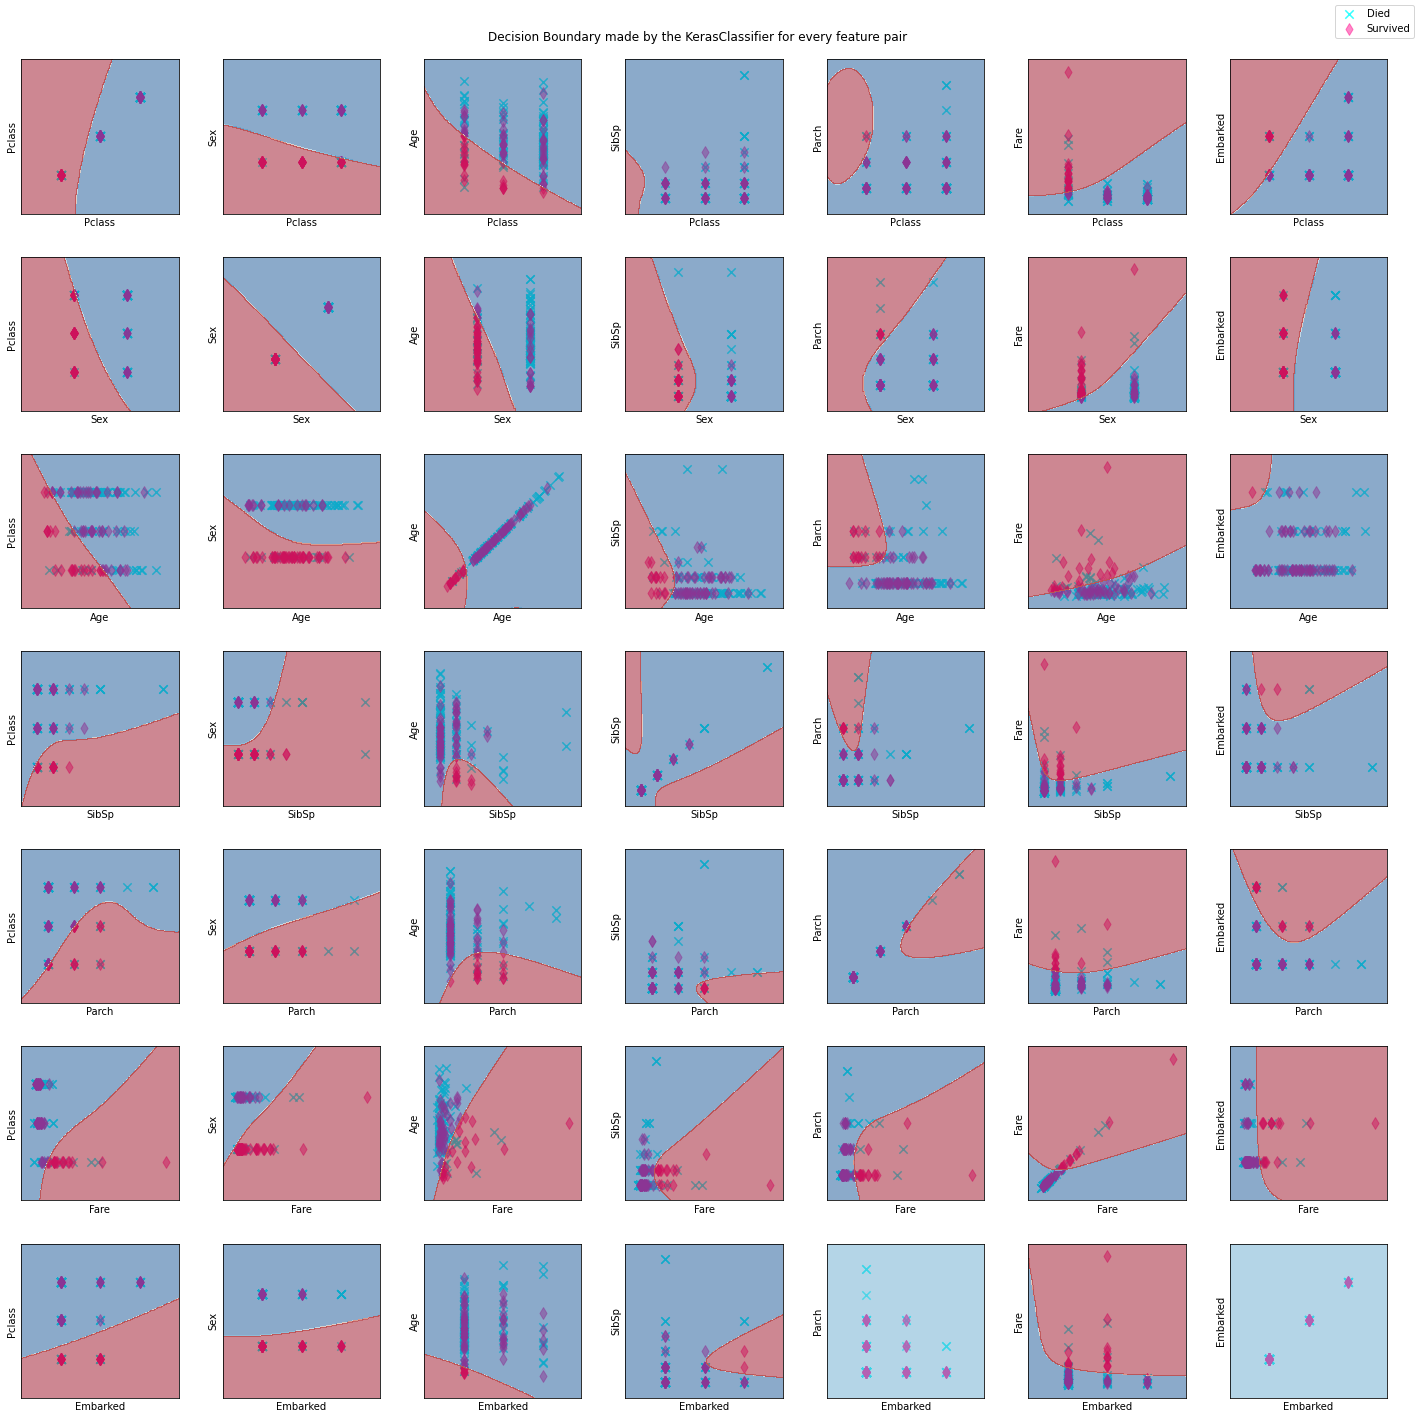

In [0]:
# Plotting Decision boundaries for each pair of features - MIGHT TAKE A WHILE TO RUN

# Copied these functions from : 
# https://stackoverflow.com/questions/51297423/plot-scikit-learn-sklearn-svm-decision-boundary-surface
# https://towardsdatascience.com/visualizing-support-vector-machine-decision-boundary-69e7591dacea

def make_meshgrid(x, y, h=.02):
    x_min, x_max = x.min() - 1, x.max() + 1
    y_min, y_max = y.min() - 1, y.max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
    return xx, yy

def plot_contours(ax, clf, xx, yy, **params):
    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    out = ax.contourf(xx, yy, Z, **params)
    return out

y_target = y_test.tolist()
y_labels = [int(target1) for target1 in y_target]

cdict = {0: 'cyan', 1: 'deeppink'}
markerdict = {0: 'x', 1: 'd'}
alphadict= {0: 0.8, 1: 0.5}
labeldict = {0: 'Died', 1: 'Survived'}

fig, ax = plt.subplots(X_test.shape[1], X_test.shape[1], figsize=(20, 20))
# fig.patch.set_facecolor('white')
for i in range(X_test.shape[1]):
  for j in range(X_test.shape[1]):
    model = model_graphs.fit(X_test[:, (i, j)], y_test)
    X0, X1 = X_test[:, i], X_test[:, j]
    xx, yy = make_meshgrid(X0, X1)
    for label in np.unique(y_labels):
      idx = np.where(y_labels == label)
      ax[i, j].scatter(X0[idx], X1[idx], c = cdict[label], label = labeldict[label], s = 70, marker = markerdict[label], alpha = alphadict[label])
      # ax[i, j].scatter(X0[idx], pred[idx], s=40, facecolors='none', edgecolors='navy', label='KerasClassifier Predictions')
    plot_contours(ax[i, j], model_graphs, xx, yy, cmap='RdBu_r', alpha=0.5)
    ax[i, j].set_xlabel(testdf.columns[i])
    ax[i, j].set_ylabel(testdf.columns[j])
    ax[i, j].set_xticks(())
    ax[i, j].set_yticks(())
handles, labels = ax[i, j].get_legend_handles_labels()    
fig.legend(handles, labels, loc='upper right')
fig.suptitle('Decision Boundary made by the KerasClassifier for every feature pair')
fig.tight_layout(pad=3)
plt.subplots_adjust(top=0.96)
# Figure is saved
fig.savefig('decision_boundary_KerasClassifier.png', dpi=300)
plt.show()

### WILL TAKE A WHILE TO RUN  : <20min